# 1. Загрузка данных и разведочный анализ

In [1]:
# Используемая для написания кода версия Phyton.

from platform import python_version
print(python_version())

3.10.9


In [2]:
# Загружаем необходимые на данном этапе библиотеки.

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [3]:
#Загружаем первый датасет и посмотрим его первые 5 строк на предмет выявления каких-либо несответствий или неинформативных столбцов.

X_bp = pd.read_excel('initial_dataset/X_bp.xlsx', index_col=0)
X_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [4]:
# Устраним неточности в названиях некоторых столбцов.

X_bp = X_bp.rename(columns={
                  'Содержание эпоксидных групп,%_2': 'Содержание эпоксидных групп, %',
                  'Температура вспышки, С_2': 'Температура вспышки, С',
                  'модуль упругости, ГПа': 'Модуль упругости, ГПа'})

In [5]:
# Загрузим второй датасет и просмотрим его первые 5 строк.
# Тут все хорошо, ничего делать не будем.

X_nup = pd.read_excel('initial_dataset/X_nup.xlsx', index_col=0)
X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [6]:
# Посмотрим размерность датасетов
X_bp.shape

(1023, 10)

In [7]:
X_nup.shape

(1040, 3)

In [8]:
# Согласно заданию, объединяем датасеты по индексу, тип — объединения "INNER".

data = X_bp.merge(X_nup, how='inner', left_index=True, right_index=True)

# Посмотрим количество колонок и столбцов

data.shape


(1023, 13)

Таким образом, новый датасет получил 1023 строки (17 строк из X_nup были удалены) и 13 столбцов (10 + 3 из двух первоначальных датасетов).

In [9]:
# Сохраним получившийся датасет
data.to_csv('data/new_dataset.csv', index=False)

In [10]:
# Ознакомимся поближе с новым датасетом, убедимся на всякий случай, что столбцы объединились без каких-либо ошибок. 
# Для удобства просмотра транспонируем получившуюся таблицу.

data.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
Модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп, %          22.267857    23.750000    33.000000   
Температура вспышки, С                 100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
Модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп, %          21.250000    22.267857  
Температура вспышки, С                 300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

Как видим, объединение датасетов прошло успешно.

In [11]:
# Теперь посмотрим общую информацию по получившемуся датасету.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп, %        1023 non-null   float64
 5   Температура вспышки, С                1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Как можно увидеть, практически все столбцы имеют тип данных "float64", кроме столбца "Угол нашивки" - "int64". 
Все 1023 строки не имеют пропущенных значений. Столбцы с типом данных "object" (текстовые значения) отсутствуют.

In [12]:
# Посмотрим также и на другие статистические характеристики для каждого столбца (среднее арифметическое значение, стандартное отклонение, минимум, максимум, квартили)

data.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп, %        1023.0    22.244390    2.406301   
Температура вспышки, С                1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп, %          14.254985    20.608034    22.230744   
Температура вспышки, С                 100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
Модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп, %          23.961934    33.000000  
Температура вспышки, С                 313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [13]:
# Посмотрим количество уникальных значений.

data.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
Модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп, %          1004
Температура вспышки, С                  1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Подавляющее большинство имеющихся значений является уникальными, кроме содержащихся в столбце "Угол нашивки".

In [14]:
# Убедимся на всякий случай в отсутствии пропущенных значений.

data.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп, %          0
Температура вспышки, С                  0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Как видим, таковых действительно нет.

In [15]:
# Проанализируем количество дубликатов.

data.duplicated().sum()

0

Оные тоже отсутствуют. Таким образом чистка датасета не требуется.

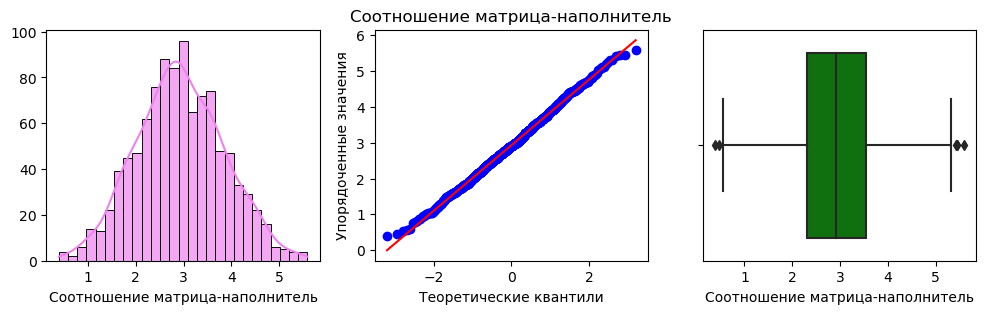

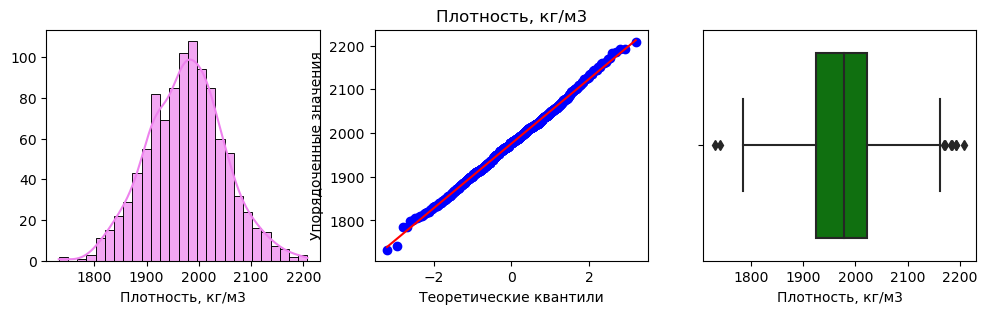

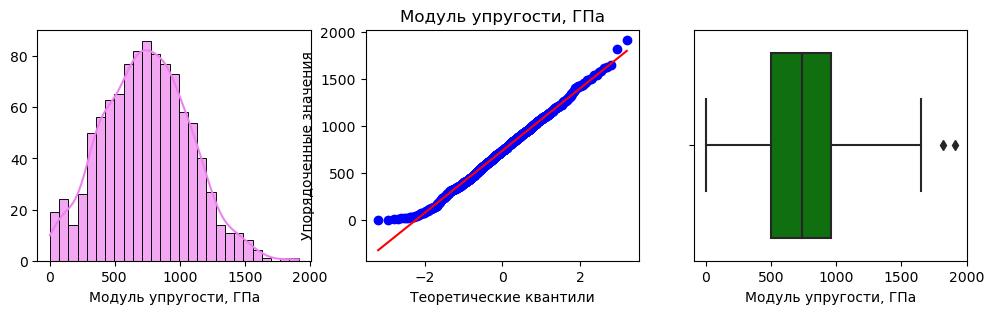

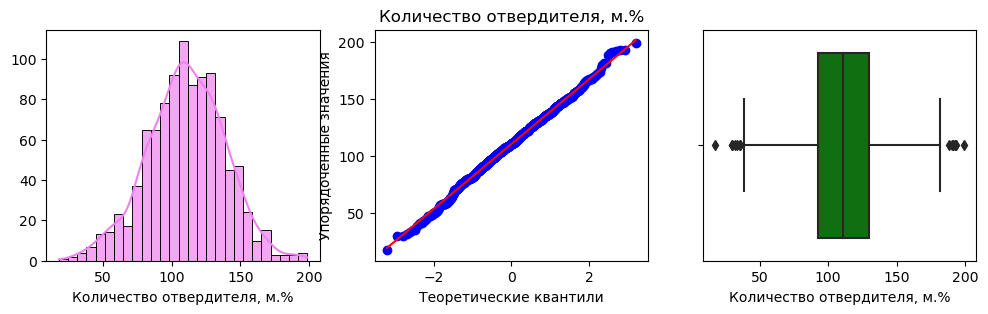

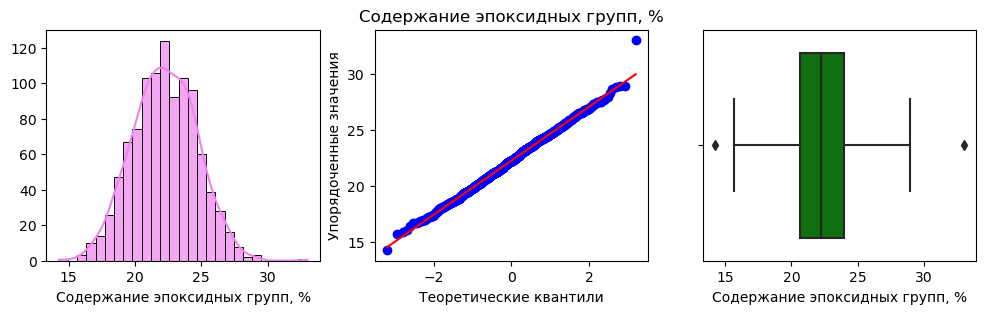

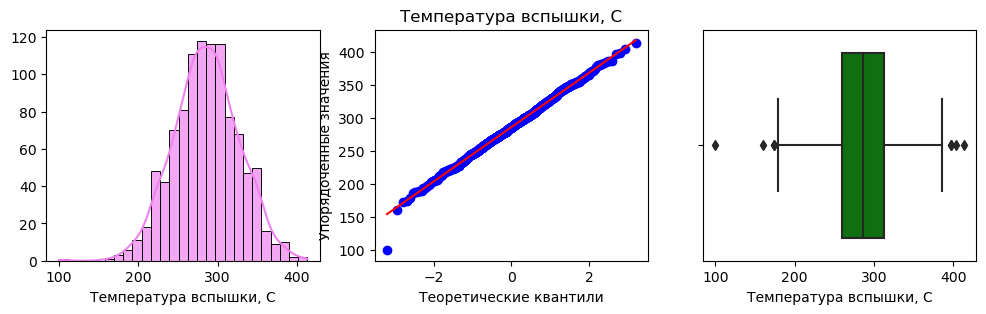

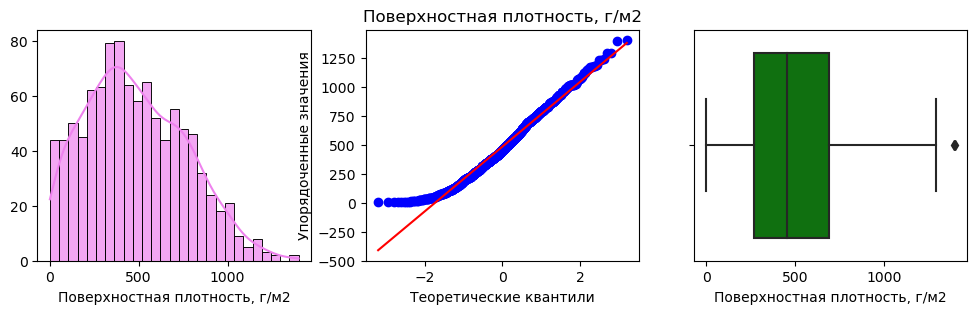

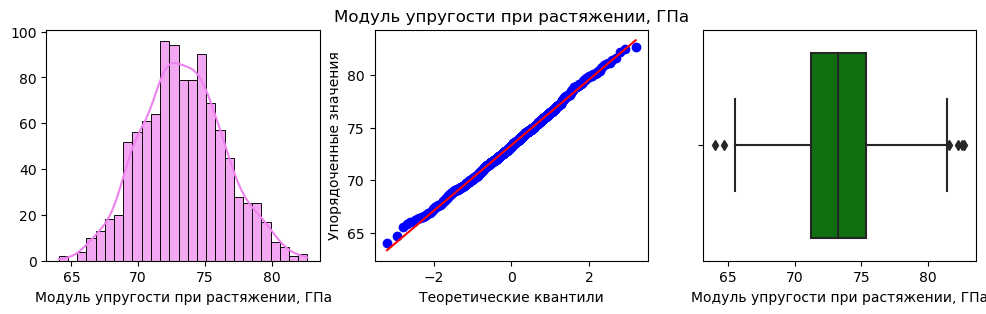

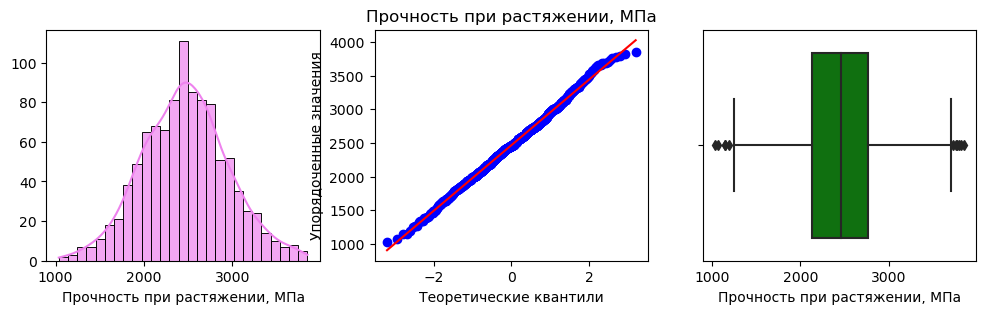

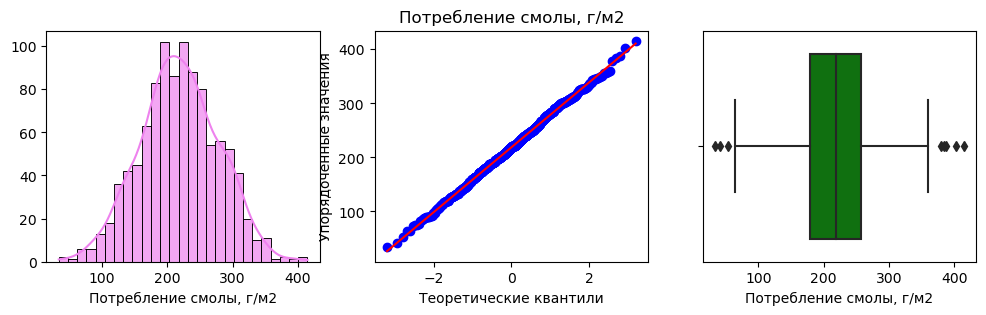

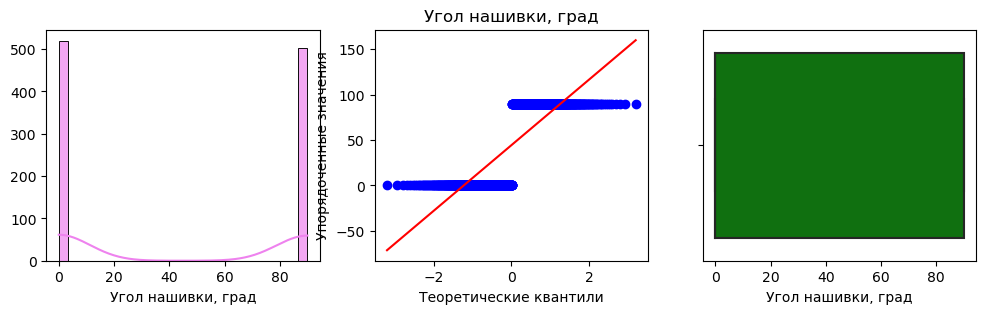

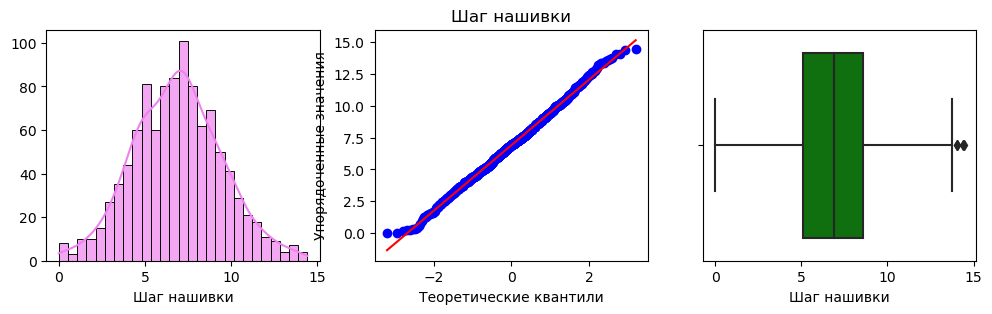

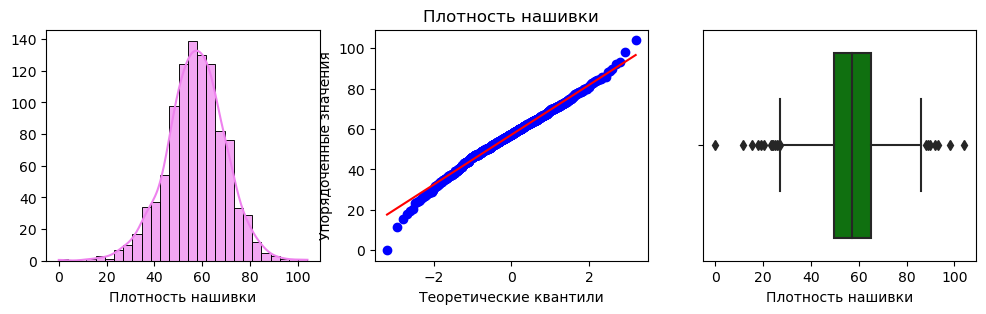

In [16]:
# Теперь приступим к визуаулизации и более дательному изучению данных.

# Итерация по всем столбцам датасета
for column in data.columns:
    
    # Создание нового графика и разбиение его на 1 строку и 3 столбца
    plt.figure(figsize=(12, 3))
    
    # Первый подграфик (гистограмма)
    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=True, x=column, bins=27, color='violet', alpha=0.7)
    plt.ylabel(None)  # Убрать подпись оси y
    
    # Второй подграфик (вероятностный график)
    plt.subplot(1, 3, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(column, fontsize=12)  # Добавить заголовок с названием столбца
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Упорядоченные значения')
    
    # Третий подграфик ("ящик с усами")
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column], color='green')
    
    plt.show()

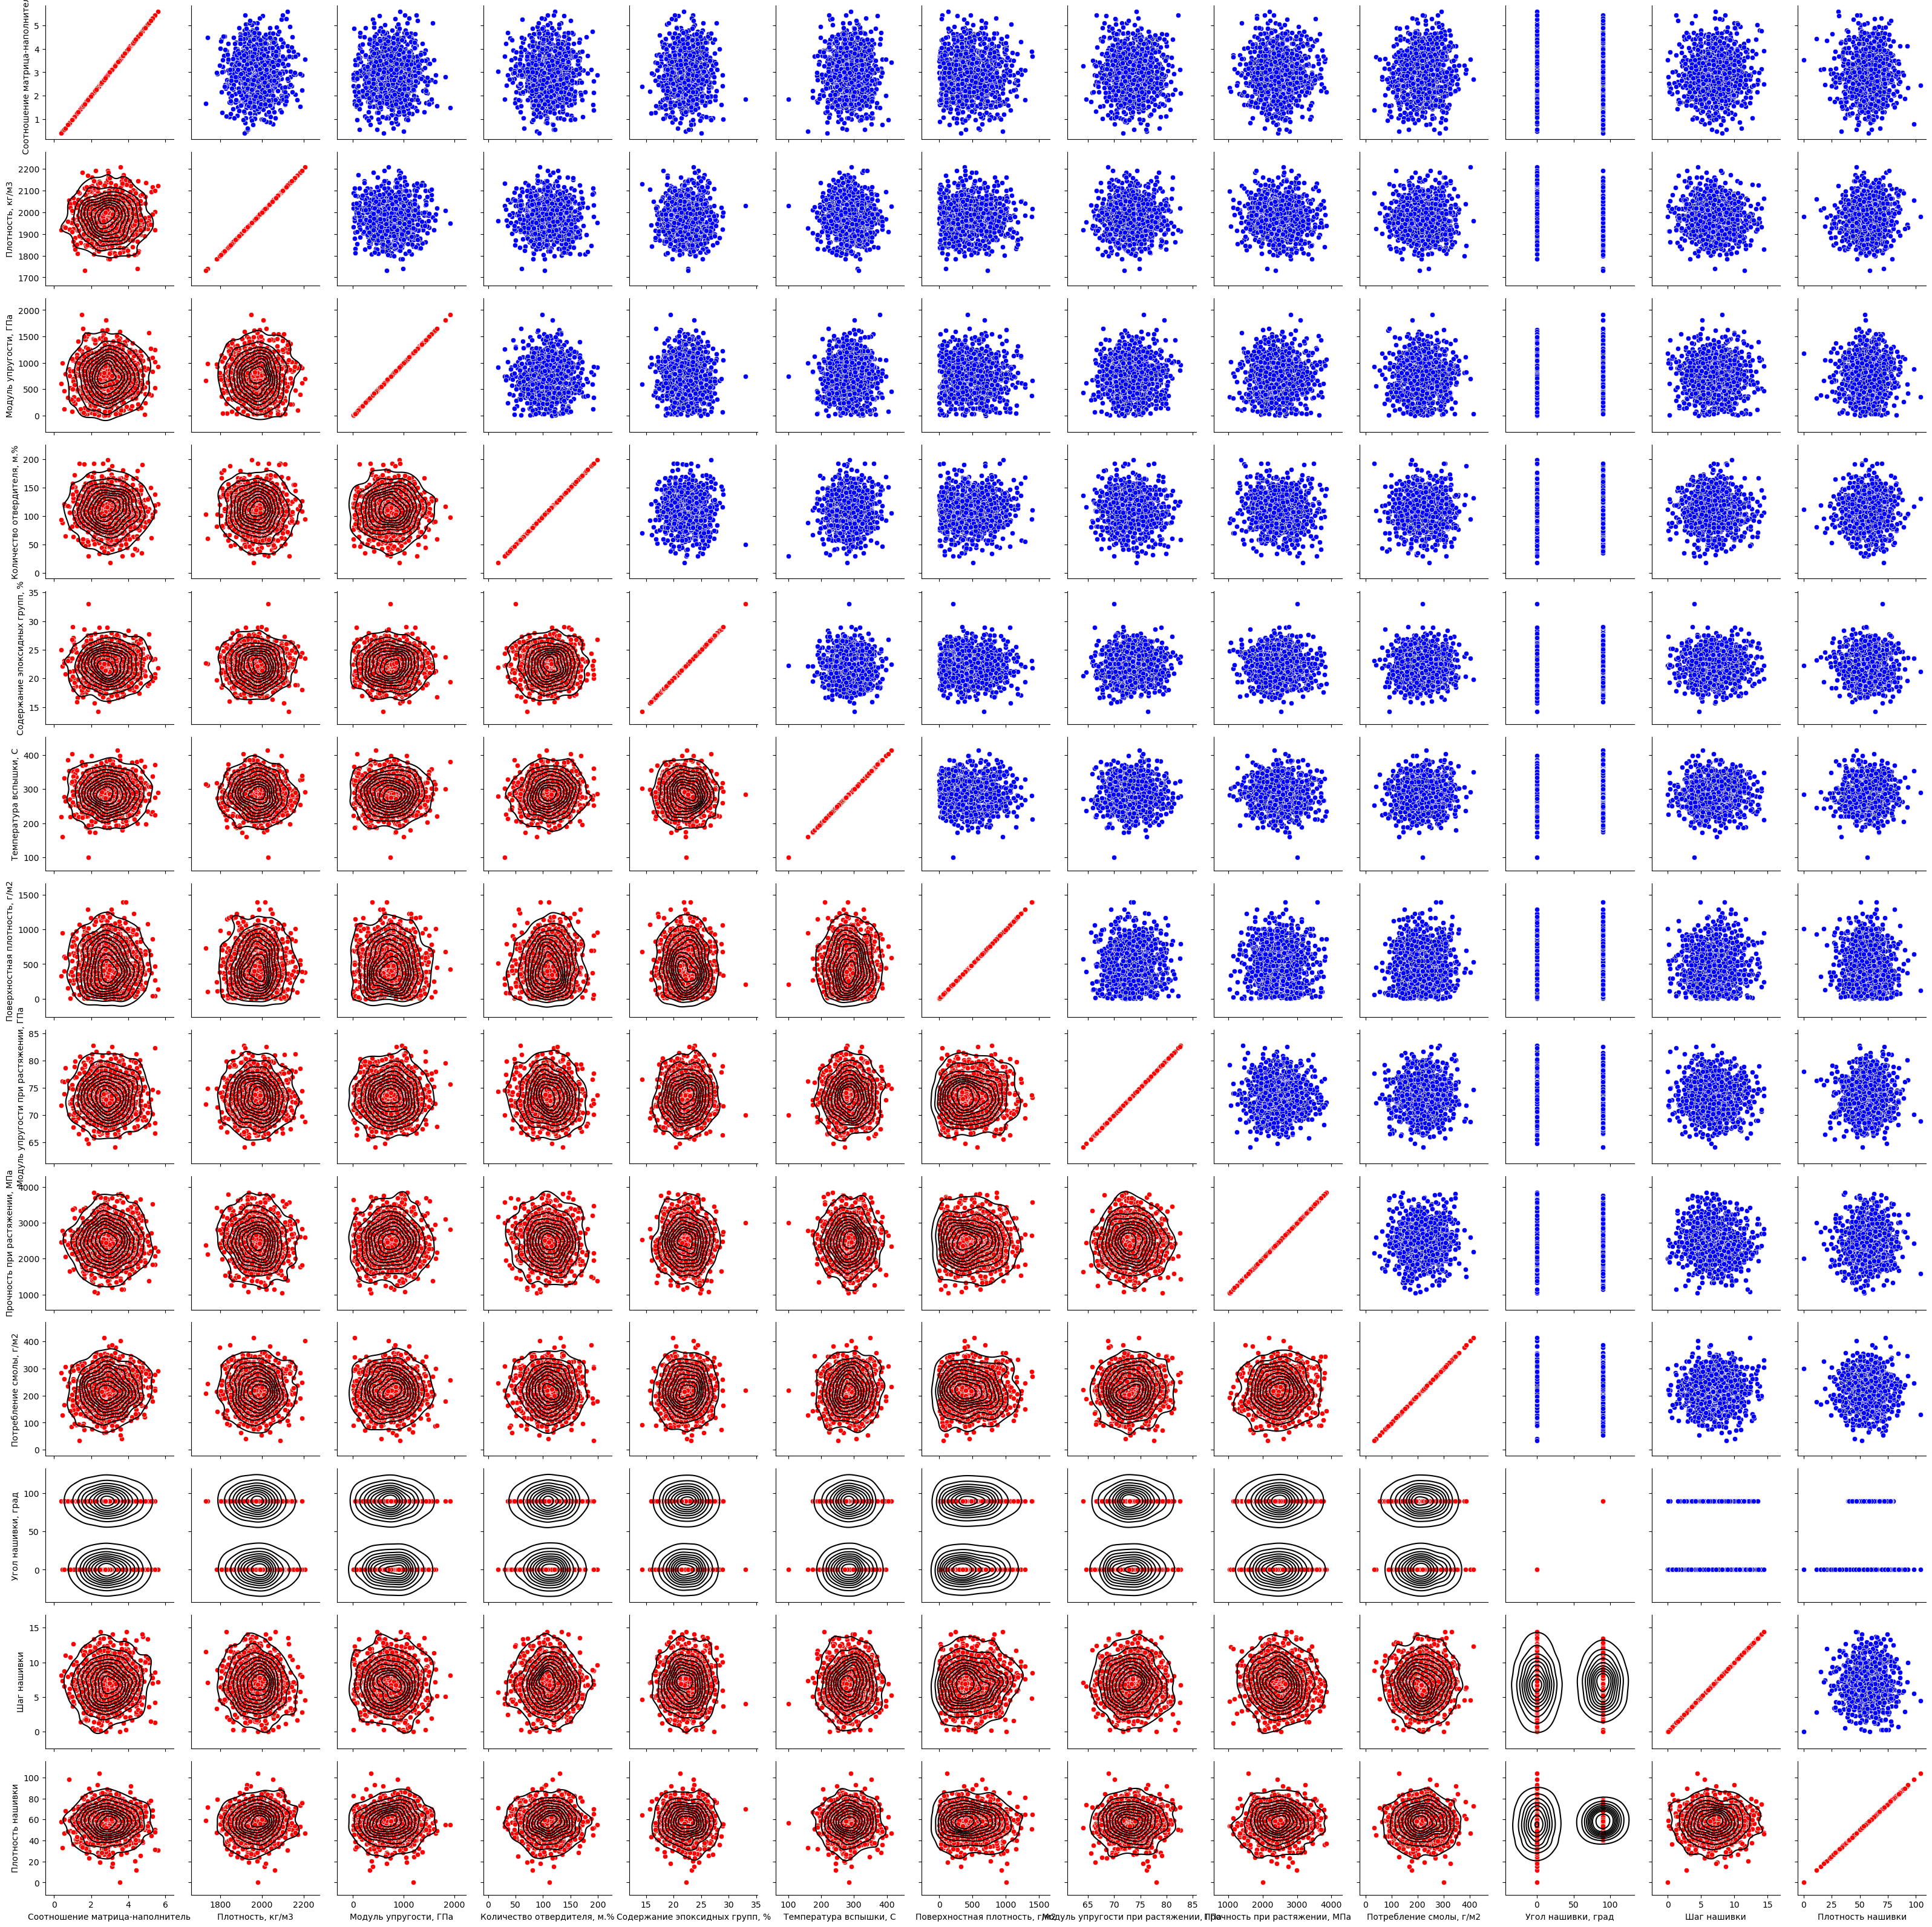

In [17]:
# Построим также попарные графики рассеивания точек для всех параметров
g = sns.PairGrid(data[data.columns])
g.map(sns.scatterplot, color = 'red')
g.map_upper(sns.scatterplot, color = 'blue')
g.map_lower(sns.kdeplot, color = 'black')
plt.show()

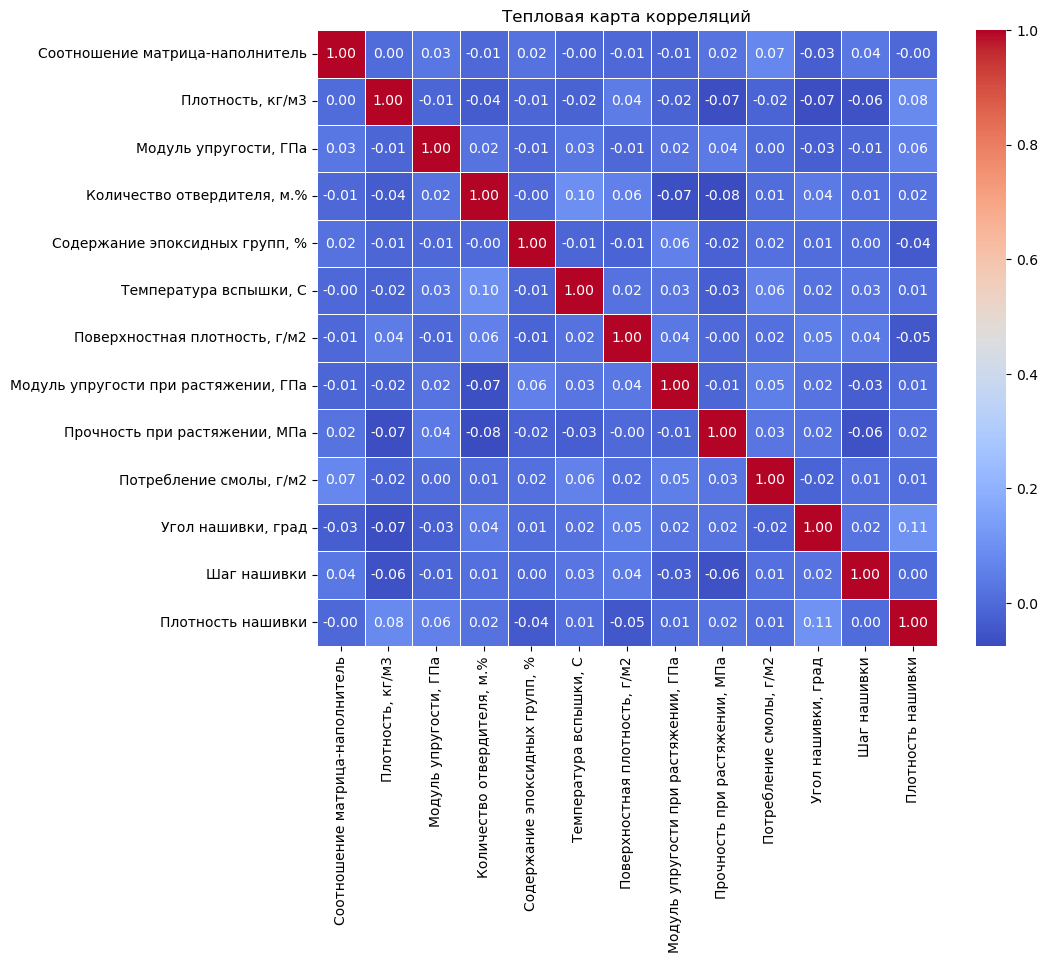

In [18]:
# Попробуем оценить на первоначалаьном этапе наличие каких-либо явных корреляций между признаками. 
# Как можно увидеть, зависимости между параметрами практически никакой нет.

plt.figure(figsize=(10, 8))
plt.title('Тепловая карта корреляций')
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt=".2f", annot_kws={"size": 10})
plt.show()

#### Вывод

В целом, проанализировав представленные графики и гистограммы, можно констатировать, что распределение почти всех признаков является более или менее нормальным, кроме некоторых параметров. В частности, распределение значений "поверхностной плотности" и "модуля упругости" несколько сдвинуто влево, а угол нашивки имеет только два параметра. Кроме того, имеют место выбросы во всех параметрах (кроме "угла нашивки"). Данные выбросы нужно будет удалить, так как они могут негативно сказаться на реализации алгоритмов машинного обучения, что, в свою очередь, может привести к существенному снижению качества итоговых результатов. Вместе с тем, выявлено также практически полное отсутствие четких взаимосвязей между параметрами.